In [69]:
import pandas as pd
import openpyxl
dataset01 = pd.read_csv('./dataset/kc_data_1.csv')
dataset02 = pd.read_csv('./dataset/kc_data_2.csv')
dataset = pd.concat([dataset01, dataset02])
# 서울만 분리해냄
dataset = dataset[dataset['시도명']=='서울']

In [70]:
guide_date = dataset['기준년월'].unique()
print(guide_date)
dataset_2018 = dataset[dataset['기준년월'] == guide_date[0]]
dataset_2019 = dataset[dataset['기준년월'] == guide_date[1]]
dataset_2020 = dataset[dataset['기준년월'] == guide_date[2]]
dataset = dataset[dataset['기준년월'] == guide_date[0]]

['2018-12' '2019-12' '2020-12']


In [71]:
# 서울시 시군구명 추출
# 결과 : 25개 모두 존재
sigoongu = list(set(dataset['시군구명']))
print(len(sigoongu), '개')
print(sigoongu)

25 개
['강동구', '서초구', '성북구', '동작구', '동대문구', '은평구', '마포구', '강북구', '양천구', '중랑구', '중구', '서대문구', '관악구', '강남구', '성동구', '노원구', '구로구', '종로구', '강서구', '광진구', '용산구', '송파구', '도봉구', '금천구', '영등포구']


In [72]:
# 강동구에 존재하는 업종중분류명종류 추출
kangdonggu = dataset[dataset['시군구명']=='강동구']
kangdonggu_upjong = list(set(kangdonggu['업종중분류명']))
print(kangdonggu_upjong)

['전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업', '기타 기계 및 장비 제조업', '펄프, 종이 및 종이제품 제조업', '환경 정화 및 복원업', '하수, 폐수 및 분뇨 처리업', '농업', '인쇄 및 기록매체 복제업', '기타 운송장비 제조업', '국제 및 외국기관', '금융 및 보험 관련 서비스업', '육상운송 및 파이프라인 운송업', '산업용 기계 및 장비 수리업', '연구개발업', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '음료 제조업', '협회 및 단체', '기타 제품 제조업', '부동산업', '기타 전문, 과학 및 기술 서비스업', '건축기술, 엔지니어링 및 기타 과학기술 서비스업', '우편 및 통신업', '의료, 정밀, 광학기기 및 시계 제조업', '도매 및 상품 중개업', '전기장비 제조업', '식료품 제조업', '사업지원 서비스업', '비금속 광물제품 제조업', '스포츠 및 오락관련 서비스업', '음식점 및 주점업', '사회복지 서비스업', '광업 지원 서비스업', '목재 및 나무제품 제조업; 가구 제외', '섬유제품 제조업; 의복제외', '의복, 의복 액세서리 및 모피제품 제조업', '정보서비스업', '화학물질 및 화학제품 제조업; 의약품 제외', '출판업', '창작, 예술 및 여가관련 서비스업', '개인 및 소비용품 수리업', '석탄, 원유 및 천연가스 광업', '폐기물 수집, 운반, 처리 및 원료 재생업', '어업', '공공행정, 국방 및 사회보장 행정', '금융업', '비금속광물 광업; 연료용 제외', '자동차 및 부품 판매업', '가구 제조업', '창고 및 운송관련 서비스업', '사업시설 관리 및 조경 서비스업', '소매업; 자동차 제외', '전문직별 공사업', '영상ㆍ오디오 기록물 제작 및 배급업', '고무 및 플라스틱제품 제조업', '숙박업', '보험 및 연금업', '임업', '전기, 가스, 증기 및 공기조절 공급업', '가죽, 가방 및 신발 제조업', '기타 개인 서비스업', '종합 건설업', '교육 서비스업', 

In [73]:
# 각 시군구별 업종중분류명 추출
middle = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    middle.extend(temp)
    # print(gu,": ", len(temp),": ", temp)

In [74]:
# 각 시군구별 업종대분류명 추출
big = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    big.extend(temp)
    # print(gu,": ", temp)

In [75]:
# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

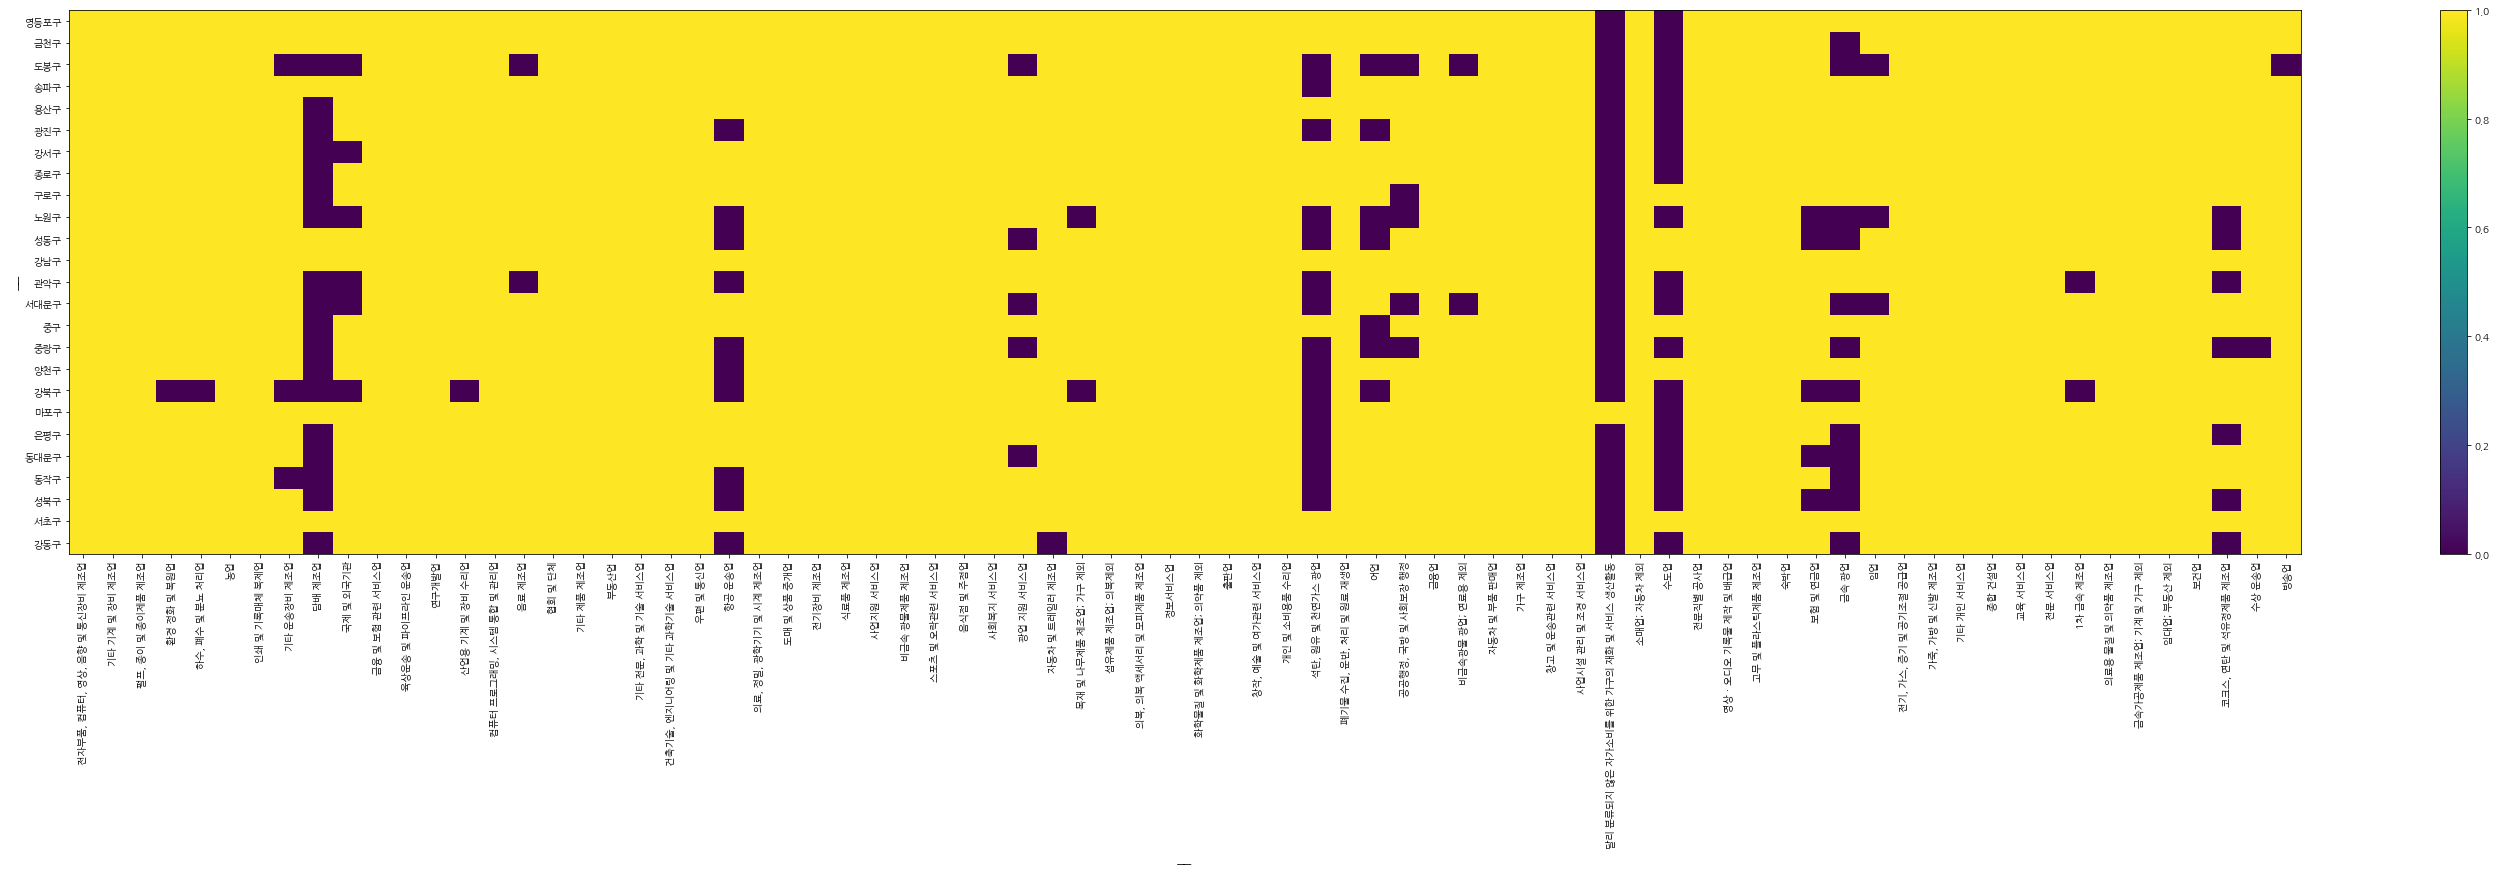

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    temp_dict = {}
    for t in temp:
        temp_dict[t] = 1
    pack.append(temp_dict)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
plt.pcolor(big_pack)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

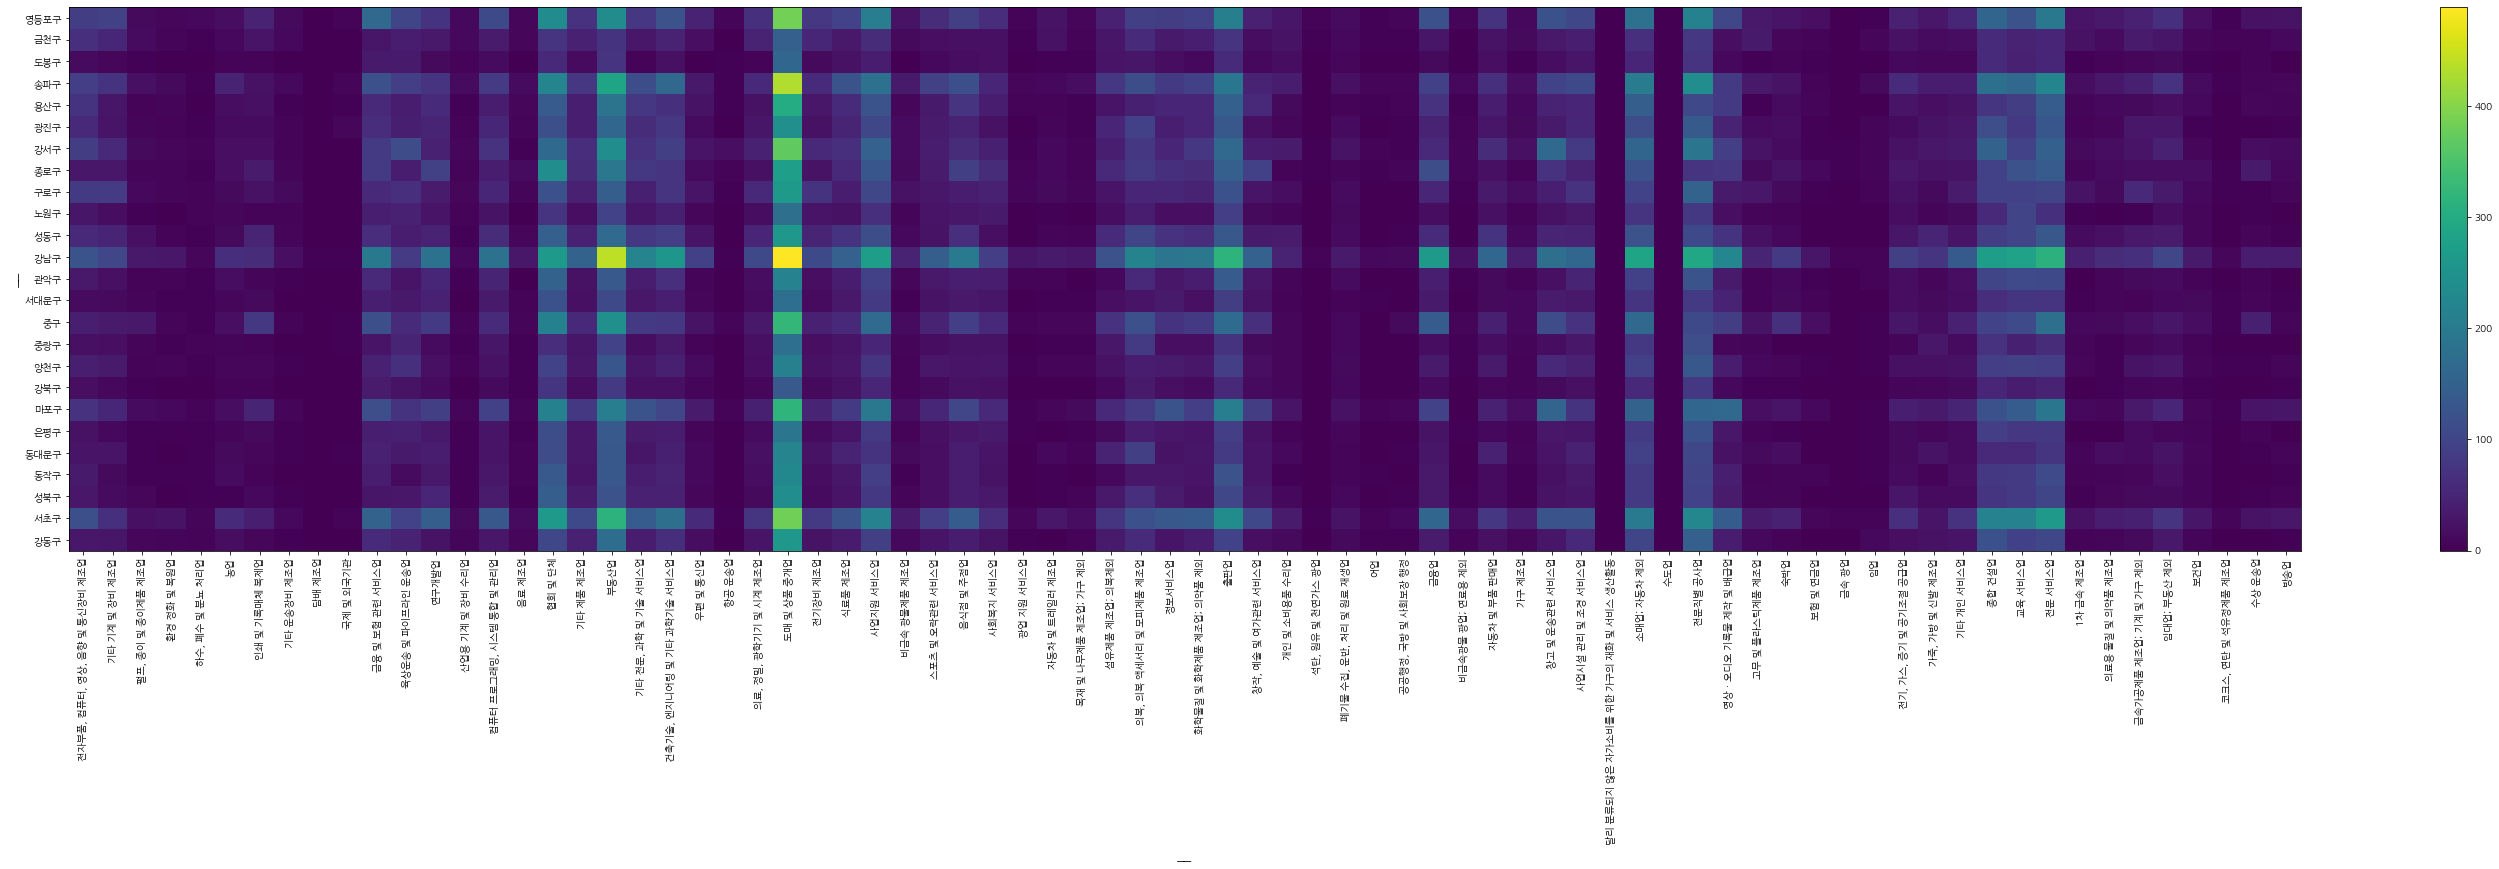

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    title = list(set(temp['업종중분류명']))
    title_count = temp['업종중분류명'].value_counts().to_dict()
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
plt.pcolor(big_pack)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [78]:
# 시군구에 존재하는 업종대분류명과 존재하지 않는 것을 dataframe으로 표현
pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    temp_dict = {}
    for t in temp:
        temp_dict[t] = 1
    pack.append(temp_dict)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=big)
big_pack.head(10)

,"예술, 스포츠 및 여가관련 서비스업",건설업,가구 내 고용활동 및 달리 분류되지 않은 자가소비 생산활동,광업,국제 및 외국기관,부동산업,"전문, 과학 및 기술 서비스업",정보통신업,"협회 및 단체, 수리 및 기타 개인 서비스업",보건업 및 사회복지 서비스업,...,"농업, 임업 및 어업","공공행정, 국방 및 사회보장 행정",운수 및 창고업,금융 및 보험업,"전기, 가스, 증기 및 공기조절 공급업",제조업,교육 서비스업,도매 및 소매업,숙박 및 음식점업,"수도, 하수 및 폐기물 처리, 원료 재생업"
강동구,1,1,NaN,1.0,1.0,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
서초구,1,1,NaN,1.0,1.0,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
성북구,1,1,NaN,1.0,1.0,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
동작구,1,1,NaN,1.0,1.0,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
동대문구,1,1,NaN,1.0,1.0,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
은평구,1,1,NaN,1.0,1.0,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
마포구,1,1,1.0,1.0,1.0,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
강북구,1,1,NaN,1.0,NaN,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
양천구,1,1,NaN,1.0,1.0,1,1,1,1,1,...,1,1.0,1,1,1,1,1,1,1,1
중랑구,1,1,NaN,1.0,1.0,1,1,1,1,1,...,1,NaN,1,1,1,1,1,1,1,1


['중기업', '대기업', '소기업', '미분류', '판단제외', '중견기업']


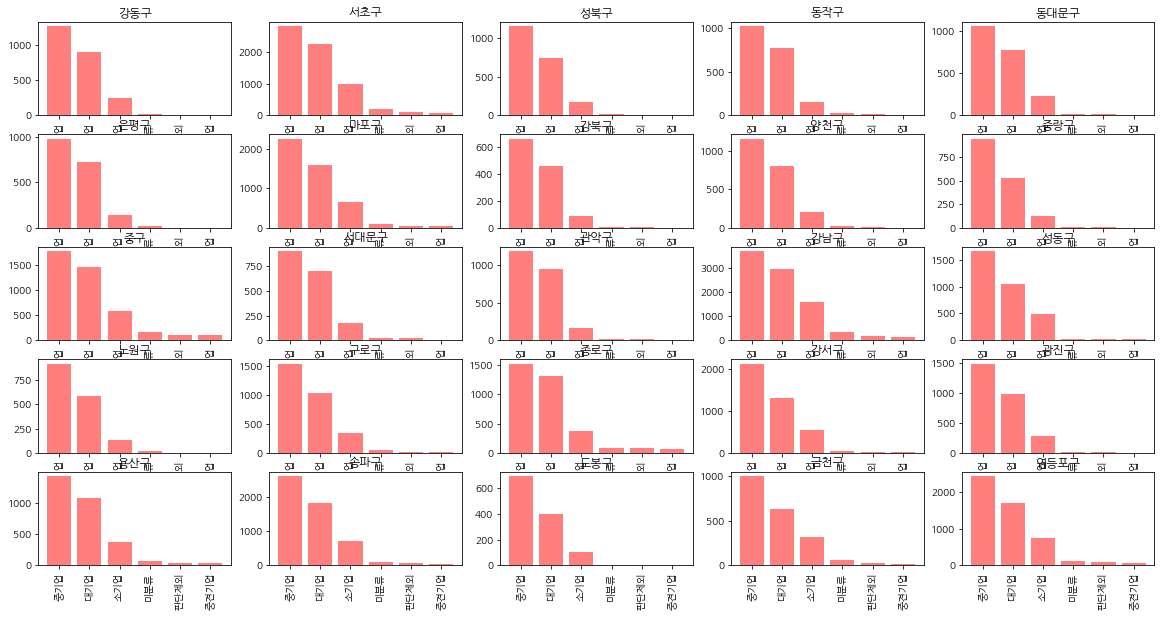

In [79]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
# 시군구별 기업 구분 개수 추출
company_dis = list(set(dataset['기업구분']))
print(company_dis)

plt.figure(figsize=(20,10))
for index, gu in enumerate(sigoongu):
    base = [ 0 for i in range(len(company_dis))]
    temp = dataset[dataset['시군구명']==gu]
    temp = temp['기업구분'].value_counts()
    for i, t in enumerate(temp):
        base[i] += t
    plt.subplot(5,5,index+1)
    plt.bar(company_dis, base, color='red', alpha=0.5)
    plt.xticks(rotation=90)
    plt.title(gu)
plt.show()

In [80]:
# 2018부터 2020까지 기업 개수에 대한 변화는 존재하지 않음
# 즉 망한 회사가 없다고 봐도 괜찮을

2018 시군구 전체 기업 구분 개수 추츨
소기업     39115
미분류     29541
중기업     10030
중견기업     1485
판단제외      929
대기업       707
Name: 기업구분, dtype: int64


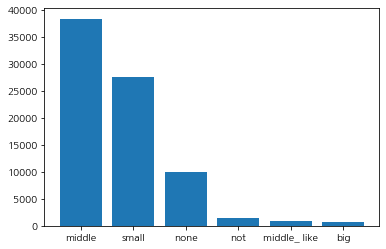

In [81]:
# 시군구 전체 기업 구분 개수 추출
#         ['중기업', '소기업', '미분류', '판단제외', '중견기업', '대기업']
x_label = ['middle', 'small', 'none', 'not', 'middle_ like', 'big']
print('2018 시군구 전체 기업 구분 개수 추츨')
print(dataset_2019['기업구분'].value_counts())
dataset_2018_total = dataset_2018['기업구분'].value_counts().tolist()
plt.bar(x_label, dataset_2018_total)
plt.show()

2019 시군구 전체 기업 구분 개수 추츨
소기업     39115
미분류     29541
중기업     10030
중견기업     1485
판단제외      929
대기업       707
Name: 기업구분, dtype: int64


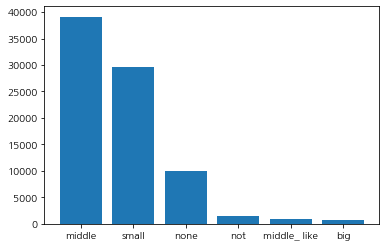

In [82]:
# 시군구 전체 기업 구분 개수 추출
#         ['중기업', '소기업', '미분류', '판단제외', '중견기업', '대기업']
x_label = ['middle', 'small', 'none', 'not', 'middle_ like', 'big']
print('2019 시군구 전체 기업 구분 개수 추츨')
print(dataset_2019['기업구분'].value_counts())
dataset_2019_total = dataset_2019['기업구분'].value_counts().tolist()
plt.bar(x_label, dataset_2019_total)
plt.show()

2019 시군구 전체 기업 구분 개수 추츨
소기업     39252
미분류     32551
중기업      9929
중견기업     1508
판단제외      923
대기업       741
Name: 기업구분, dtype: int64


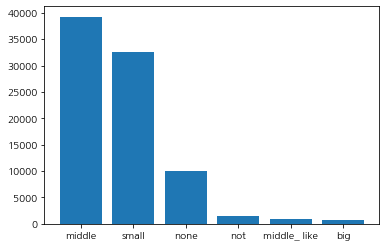

In [83]:
# 시군구 전체 기업 구분 개수 추출
#         ['중기업', '소기업', '미분류', '판단제외', '중견기업', '대기업']
x_label = ['middle', 'small', 'none', 'not', 'middle_ like', 'big']
print('2019 시군구 전체 기업 구분 개수 추츨')
print(dataset_2020['기업구분'].value_counts())
dataset_2020_total = dataset_2020['기업구분'].value_counts().tolist()
plt.bar(x_label, dataset_2020_total)
plt.show()

In [88]:
from numpy import dot
from numpy.linalg import norm
import itertools
import operator
import pprint

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    title = list(set(temp['업종중분류명']))
    title_count = temp['업종중분류명'].value_counts().to_dict()
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)

comb = list(itertools.combinations(sigoongu, 2))
result = {}
for x in comb:
    result['{}:{}'.format(x[0], x[1])] = cos_sim(big_pack.loc[x[0]].tolist(), big_pack.loc[x[1]].tolist())

sdict= sorted(result.items(), key=operator.itemgetter(1), reverse=True)
print('유사도가 높은 지역 Top 10 : ')
pprint.pprint(sdict[:10])
print('유사도가 낮은 지역 Top 10 : ')
pprint.pprint(sdict[-11:-1])

유사도가 높은 지역 Top 10 : 
[('은평구:강북구', 0.9917685636743645),
 ('서초구:강남구', 0.9908796353526457),
 ('광진구:송파구', 0.9888594608731454),
 ('동작구:관악구', 0.9873521542647274),
 ('성북구:동작구', 0.9872397708217284),
 ('강동구:은평구', 0.9860927406291397),
 ('강동구:강북구', 0.9855561210881123),
 ('동작구:서대문구', 0.9854848246343835),
 ('강동구:양천구', 0.9852194516770366),
 ('송파구:영등포구', 0.9850512772263355)]
유사도가 낮은 지역 Top 10 : 
[('중랑구:중구', 0.9044664002563998),
 ('서초구:중랑구', 0.9027537247343352),
 ('도봉구:금천구', 0.902115093673504),
 ('동작구:금천구', 0.9004807901246898),
 ('종로구:도봉구', 0.9000306466784387),
 ('마포구:도봉구', 0.8999111722170877),
 ('종로구:금천구', 0.8930626893353403),
 ('중랑구:강남구', 0.8909982324750568),
 ('마포구:중랑구', 0.8904278661166193),
 ('강남구:도봉구', 0.8808484995499545)]
